In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


[1.4444444458861458, 9.139068736488092]
40.95231173871233
390


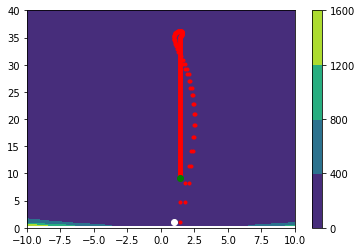

In [3]:
from numpy.core.fromnumeric import resize
X=[-1,3,5,-2,0,4,1,6,-3]
N=len(X)


func = lambda th: N*np.log(2*np.pi*th[1])+ sum((X-th[0])**2)/(2*th[1])

#Representamos la función
_x =np.linspace(-10,10, 100)
_y =np.linspace(0,40, 100)
_z=np.zeros((100,100))

for ix, x in enumerate(_x):
  for iy, y in enumerate(_y):
    _z[iy,ix]=func([x,y])

plt.contourf(_x,_y,_z,4)
plt.colorbar()

#Algoritmo Momentum

Theta = [1,1]
Thetaold=[0,0]
lr=0.1
li= 0.9
plt.plot(Theta[0],Theta[1], "o", c = "white")
grad=np.zeros(2)
vmo=np.zeros(2)
contador= 0
diferencia=1

XX=[0,0,0,0,0,0,0,0,0]
XXX=[0,0,0,0,0,0,0,0,0]
for _ in range(10000):
   
  if diferencia < 10**-5:
    break
  else:
    for it, th in enumerate(X):
      XX[it]=X[it]-Theta[0]
      XXX[it]=(X[it]-Theta[0])**2
    grad[0] = -sum(XX)/Theta[1]
    grad[1]= N/(2*Theta[1])-sum(XXX)/(2*Theta[1]**2)
    #print(grad)

    
    for it, th in enumerate(Theta):
      vmo[it]= li*vmo[it] - lr* grad[it]

      Thetaold[it]=Theta[it]
      Theta[it] = Theta[it] + vmo[it]
      plt.plot(Theta[0],Theta[1], ".", c = "red") 

    diferencia=np.sqrt((Thetaold[0]-Theta[0])**2+(Thetaold[1]-Theta[1])**2)
    #print(diferencia)
    contador=contador+1
     
    #print(Theta)

plt.plot(Theta[0],Theta[1], "o", c = "green")
print(Theta)
print(func(Theta))
print(contador)

